<a href="https://colab.research.google.com/github/sammyfow/cap-comp215/blob/2024.01/project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 1
Name: Sam Fowler

Start Date: 02/05/2024

End Date:

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

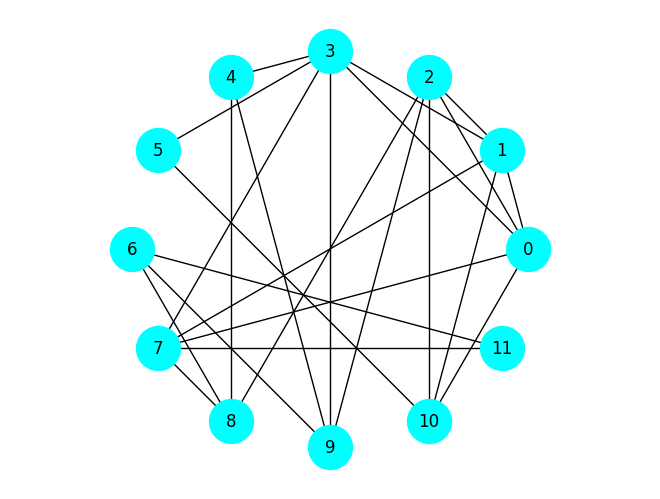

132
[(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (2, 4), (3, 4), (3, 5), (4, 5), (4, 6), (5, 6), (5, 7), (6, 7), (6, 8), (7, 8), (7, 9), (8, 9), (8, 10), (9, 10), (9, 11), (10, 11), (10, 0), (11, 0), (11, 1)]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
(0.4444444444444444, 1.8181818181818181)
[[0.72413793 2.18181818]
 [0.72407045 2.18014141]
 [0.72370562 2.16882828]
 [0.72335543 2.16329293]
 [0.72120854 2.11034343]
 [0.71523531 2.05571717]
 [0.68704823 1.92755556]
 [0.60044618 1.75343434]
 [0.40745061 1.69830303]
 [0.31117405 1.69846465]]


In [130]:


example = np.logspace(1, 10, 10)
#nodes = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


def better_pairs(nodes):
  for i, u in enumerate(nodes):
    for j, v in enumerate(nodes):
      if i > j:
        yield u, v


def make_complete_graph(n):
  points = range(n)
  graph = nx.Graph()
  graph.add_nodes_from(points)
  graph.add_edges_from(better_pairs(points))
  return graph


def reachable_nodes(graph, start):
  seen = set()
  stack = [start]
  while stack:
      node = stack.pop()
      seen.add(node)
      neighbors = graph.neighbors(node)
      for n in neighbors:
        if n not in seen:
          seen.add(n)
          stack.append(n)
  return seen


def is_complete(g):
  start = next(iter(g))
  reachable = reachable_nodes(g, start)
  return len(g) == len(reachable)


def adjecent_edges(n, k):
  nodes = range(n)
  for i in nodes:
    for j in range(k // 2):
      yield i, (i + j + 1) % n


def make_ring_lattice(n, k):
  g = nx.Graph()
  nodes = range(n)
  g.add_nodes_from(nodes)
  g.add_edges_from(adjecent_edges(n, k))
  return g


def rewire(g, p):
  nodes = set(g)
  for a, b in g.edges():
    if np.random.random() < p:
      choices = nodes - {a} - set(g[a])
      new_b = np.random.choice(list(choices))
      g.remove_edge(a, b)
      g.add_edge(a, new_b)
  return g


def make_ws_graph(n, k, p):
  ws = rewire(make_ring_lattice(n, k), p)
  return ws


def node_clustering(G, node):
  neighbours = list(G[node])
  k = len(neighbours)
  if k < 2:
    return np.nan
  possible = k * (k - 1) / 2
  edges = 0
  for a, b in better_pairs(neighbours):
    if G.has_edge(a, b):
      edges +=1
  return edges / possible


def clustering_coefficient(G):
  cluster = [node_clustering(G, node) for node in list(G)]
  return np.nanmean(cluster)


def path_lengths(G):
  lengths = []
  for a in list(G):
    for b in list(G):
      if a !=b:
        lengths.append(nx.shortest_path_length(G, source=a, target=b))
  return lengths


def mean_shortest_path(G):
  lengths = path_lengths(G)
  mean = np.mean(lengths)
  return mean


def run_single_graph(n, k, p):
  ws = make_ws_graph(n, k, p)
  cc = clustering_coefficient(ws)
  msp = mean_shortest_path(ws)
  return cc, msp

ps = np.logspace(-5, 0, 10)
def run_experiment(n, k, iters):
  results = []
  for p in ps:
    trials = [run_single_graph(n, k, p) for t in range(iters)]
    means = np.array(trials).mean(axis=0)
    results.append(means)
  return np.array(results)


lattice = make_ws_graph(12, 4, 1)
nx.draw_circular(lattice,
                 node_color='cyan',
                 node_size=1000,
                 with_labels=True)
plt.axis('equal')
plt.show()



#print(len([(a, b) for a, b in better_pairs(list(lattice))]))
print(len(path_lengths(lattice)))
print(list(adjecent_edges(12, 4)))
print(list(lattice))
#print(path_lengths(make_ws_graph(10, 4, 1)))
print(run_single_graph(12, 4, 0.3))
print(run_experiment(100, 30, 10))